<a href="https://colab.research.google.com/github/Sayemahamed/AI-Lab-Project/blob/main/trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms ,datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import DataLoader

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/prepared_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: prepared_data/train/Normal/Normal-3663.png  
  inflating: prepared_data/train/Normal/Normal-3664.png  
  inflating: prepared_data/train/Normal/Normal-3665.png  
  inflating: prepared_data/train/Normal/Normal-3666.png  
  inflating: prepared_data/train/Normal/Normal-3667.png  
  inflating: prepared_data/train/Normal/Normal-3668.png  
  inflating: prepared_data/train/Normal/Normal-3669.png  
  inflating: prepared_data/train/Normal/Normal-367.png  
  inflating: prepared_data/train/Normal/Normal-3670.png  
  inflating: prepared_data/train/Normal/Normal-3671.png  
  inflating: prepared_data/train/Normal/Normal-3672.png  
  inflating: prepared_data/train/Normal/Normal-3673.png  
  inflating: prepared_data/train/Normal/Normal-3674.png  
  inflating: prepared_data/train/Normal/Normal-3675.png  
  inflating: prepared_data/train/Normal/Normal-3676.png  
  inflating: prepared_data/train/Normal/Normal-3677.png  
  inflating: prepared_

In [ ]:
transform = transforms.Compose([
    transforms.Resize((300,300)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


In [ ]:
train_data = datasets.ImageFolder(root='./prepared_data/train', transform=transform)
test_data = datasets.ImageFolder(root='./prepared_data/test', transform=transform)

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
train_data[10][0]

tensor([[[ 0.2624,  0.3138,  0.3481,  ..., -2.1179, -2.1179, -2.1179],
         [ 0.2111,  0.2624,  0.3309,  ..., -2.0837, -2.0837, -2.1008],
         [ 0.1426,  0.1939,  0.2624,  ..., -2.0494, -2.0494, -2.0665],
         ...,
         [-2.0665, -2.1008, -2.0665,  ..., -0.9192, -1.0562, -1.1418],
         [-2.0494, -2.1008, -2.1008,  ..., -0.9192, -1.0562, -1.1418],
         [-2.0323, -2.0837, -2.1008,  ..., -0.9192, -1.0562, -1.1418]],

        [[ 0.3978,  0.4503,  0.4853,  ..., -2.0357, -2.0357, -2.0357],
         [ 0.3452,  0.3978,  0.4678,  ..., -2.0007, -2.0007, -2.0182],
         [ 0.2752,  0.3277,  0.3978,  ..., -1.9657, -1.9657, -1.9832],
         ...,
         [-1.9832, -2.0182, -1.9832,  ..., -0.8102, -0.9503, -1.0378],
         [-1.9657, -2.0182, -2.0182,  ..., -0.8102, -0.9503, -1.0378],
         [-1.9482, -2.0007, -2.0182,  ..., -0.8102, -0.9503, -1.0378]],

        [[ 0.6182,  0.6705,  0.7054,  ..., -1.8044, -1.8044, -1.8044],
         [ 0.5659,  0.6182,  0.6879,  ..., -1

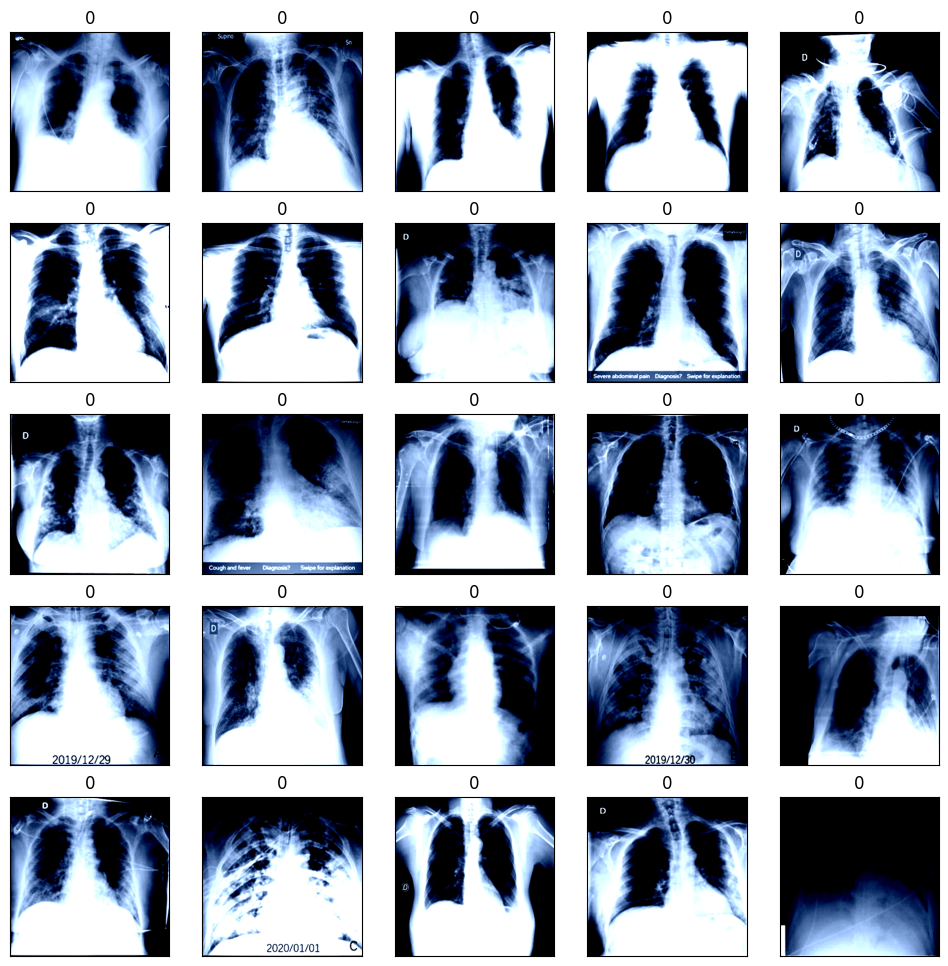

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_data[i][0].permute(1,2,0))
    plt.title(train_data[i][1])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
class NEURAL_NETWORK(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Input -> Conv1
            nn.Dropout2d(0.2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Conv2
            nn.MaxPool2d(2, 2),  # Downsample (Pool1) -> 149x149
            nn.Dropout2d(0.2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Conv3
            nn.MaxPool2d(2, 2),  # Downsample (Pool2) -> 74x74
            nn.Dropout2d(0.2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),  # Conv4
            nn.MaxPool2d(2, 2),  # Downsample (Pool3) -> 37x37
            nn.Dropout2d(0.2),
            nn.BatchNorm2d(256 ),
            nn.Flatten(),  # Flatten features
            nn.Linear(256 * 37 * 37, 128),  # Fully Connected Layer 1
            nn.ReLU(),
            nn.Linear(128, 64),  # Fully Connected Layer 2
            nn.ReLU(),
            nn.Linear(64, 2),  # Output Layer
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
def train_and_evaluate(model, device, train_loader, test_loader, optimizer, epoch):
    # Training phase
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    train_progress = tqdm(train_loader, desc=f"Training Epoch {epoch}", unit="batch")

    for batch_idx, (data, target) in enumerate(train_progress):
        # Move data to the device
        data, target = data.to(device), target.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Compute loss
        loss = F.cross_entropy(output, target)
        train_loss += loss.item()

        # Backward pass and optimizer step
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        pred = output.argmax(dim=1)
        train_correct += (pred == target).sum().item()
        train_total += target.size(0)

        # Update the progress bar
        train_progress.set_postfix({
            "Loss": f"{loss.item():.4f}",
            "Accuracy": f"{100 * train_correct / train_total:.2f}%"
        })

    # Log training metrics
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = 100 * train_correct / train_total
    print(f"Epoch {epoch} - Training Summary: Loss = {avg_train_loss:.4f}, Accuracy = {train_accuracy:.2f}%")

    # Evaluation phase
    model.eval()
    test_loss = 0
    test_correct = 0
    test_total = 0
    test_progress = tqdm(test_loader, desc="Evaluating", unit="batch")

    with torch.inference_mode():
        for batch_idx, (data, target) in enumerate(test_progress):
            # Move data to the device
            data, target = data.to(device), target.to(device)

            # Forward pass
            output = model(data)
            output = F.softmax(output, dim=1)
            # Compute loss
            loss = F.cross_entropy(output, target)
            test_loss += loss.item()

            # Calculate accuracy
            pred = output.argmax(dim=1)
            test_correct += (pred == target).sum().item()
            test_total += target.size(0)

            # Update the progress bar
            test_progress.set_postfix({
                "Loss": f"{loss.item():.4f}",
                "Accuracy": f"{100 * test_correct / test_total:.2f}%"
            })

    # Log evaluation metrics
    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * test_correct / test_total
    print(f"Epoch {epoch} - Evaluation Summary: Loss = {avg_test_loss:.4f}, Accuracy = {test_accuracy:.2f}%")

    return {
        "train_loss": avg_train_loss,
        "train_accuracy": train_accuracy,
        "test_loss": avg_test_loss,
        "test_accuracy": test_accuracy
    }

In [ ]:
model = NEURAL_NETWORK()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
for epoch in range(1,4):
    train_and_evaluate(model, device, train_loader, test_loader, optimizer, epoch)

torch.save(model.state_dict(), '/content/drive/My Drive/model.pth')

Training Epoch 1: 100%|██████████| 346/346 [02:40<00:00,  2.16batch/s, Loss=0.1781, Accuracy=87.70%]


Epoch 1 - Training Summary: Loss = 0.2859, Accuracy = 87.70%


Evaluating: 100%|██████████| 87/87 [00:23<00:00,  3.73batch/s, Loss=0.3290, Accuracy=89.58%]


Epoch 1 - Evaluation Summary: Loss = 0.4201, Accuracy = 89.58%


Training Epoch 2: 100%|██████████| 346/346 [02:40<00:00,  2.16batch/s, Loss=0.0109, Accuracy=94.52%]


Epoch 2 - Training Summary: Loss = 0.1506, Accuracy = 94.52%


Evaluating: 100%|██████████| 87/87 [00:22<00:00,  3.80batch/s, Loss=0.3570, Accuracy=93.45%]


Epoch 2 - Evaluation Summary: Loss = 0.3860, Accuracy = 93.45%


Training Epoch 3: 100%|██████████| 346/346 [02:40<00:00,  2.15batch/s, Loss=0.2008, Accuracy=96.82%]


Epoch 3 - Training Summary: Loss = 0.0867, Accuracy = 96.82%


Evaluating: 100%|██████████| 87/87 [00:23<00:00,  3.68batch/s, Loss=0.4102, Accuracy=93.56%]


Epoch 3 - Evaluation Summary: Loss = 0.3844, Accuracy = 93.56%
